In [ ]:
!pip install -U tensorflow_datasets

In [ ]:
import tensorflow as tf

In [ ]:
#importacao de datasets do tensorflow
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
# bibliotecas usadas
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = metadata.features['label'].names
print ("Class names:{}".format (class_names))

Class names:['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training exampes: {}'.format(num_train_examples))
print ('Number of test examples: {}'.format(num_test_examples))

Number of training exampes: 60000
Number of test examples: 10000


In [ ]:
def normalize (images,labels):
  images = tf.cast(images,tf.float32)
  images/=255
  return images,labels

  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

  train_dataset = train_dataset.cache()
  test_dataset= test_dataset.cache()

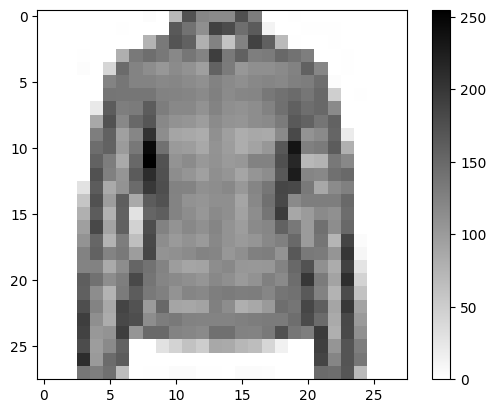

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

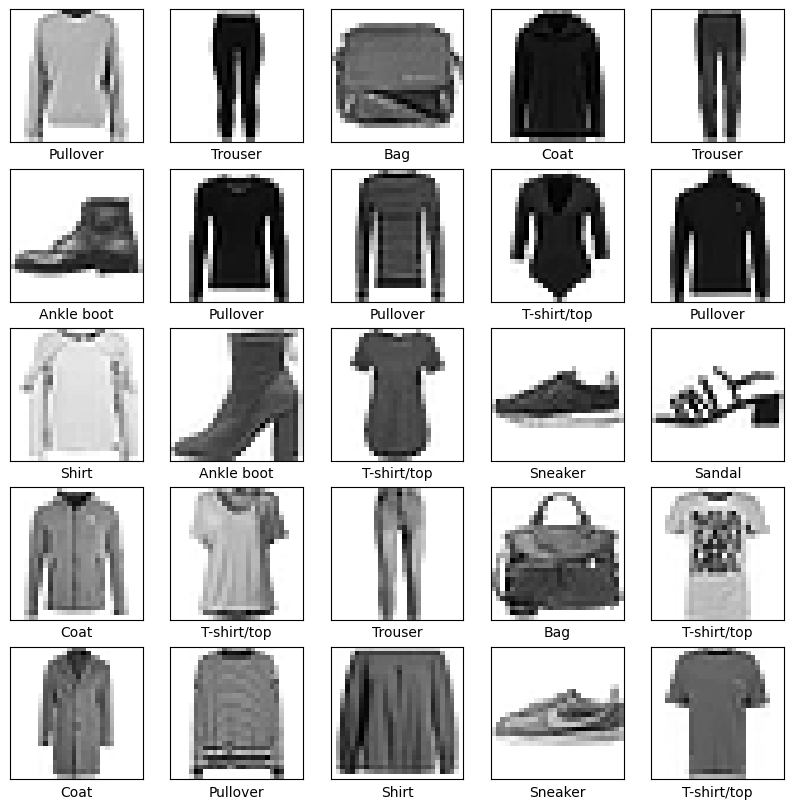

In [ ]:
# Run the code again
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate (train_dataset.take(25)):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE=32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 3.1470 - accuracy: 0.6908
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.7204 - accuracy: 0.7451
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6314 - accuracy: 0.7690
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5703 - accuracy: 0.7922
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5465 - accuracy: 0.8071


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print ('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.5726 - accuracy: 0.8087
Accuracy on test dataset: 0.8087000250816345


In [ ]:
for test_images, test_labels in test_dataset.take (1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 72ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([0.02981729, 0.00793187, 0.25456038, 0.02989892, 0.49842238,
       0.01160633, 0.13775377, 0.00560775, 0.02045733, 0.00394396],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format (class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
               color=color)
def plot_value_array(i,predictions_array,true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax([predictions_array])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

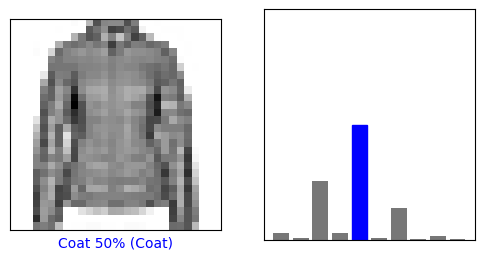

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

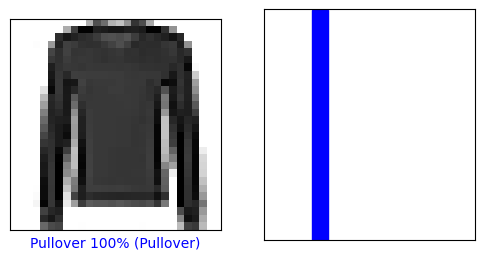

In [ ]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)



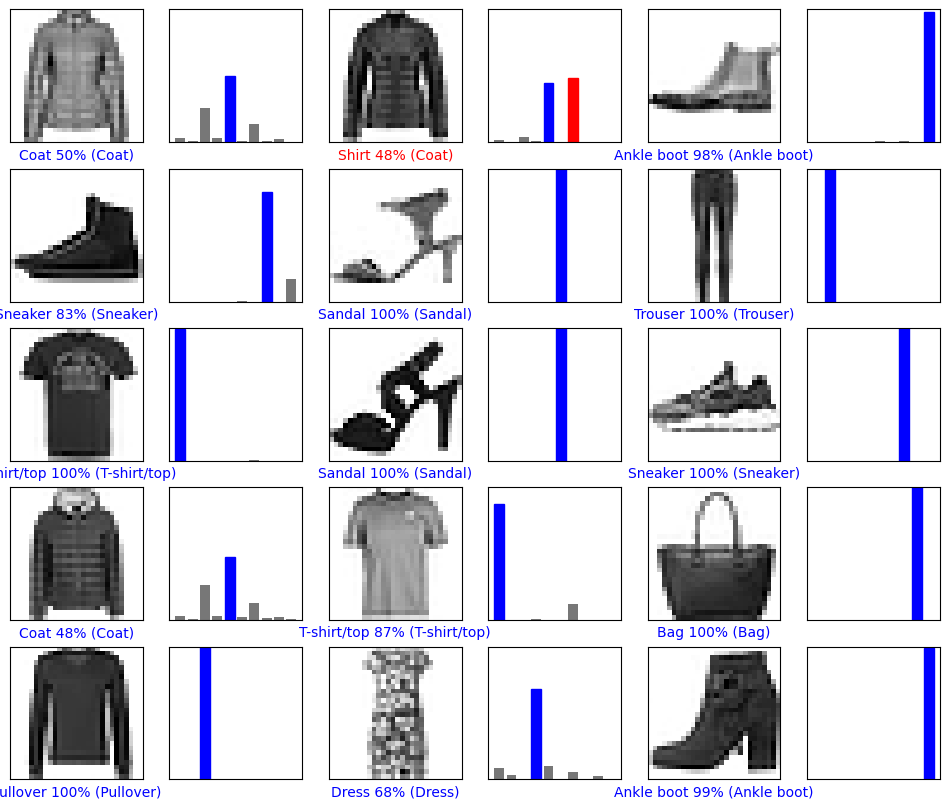

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i,predictions, test_labels)

In [ ]:
img = test_images[0]
print (img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 72ms/step
[[0.02981729 0.00793188 0.2545604  0.02989892 0.49842232 0.01160636
  0.13775374 0.00560777 0.02045735 0.00394398]]


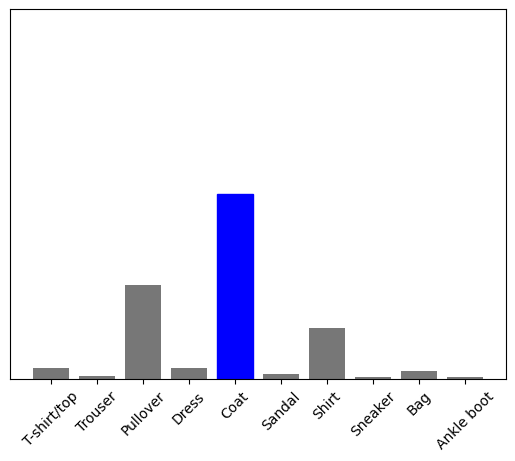

In [ ]:
plot_value_array(0,predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [ ]:
np.argmax(predictions_single[0])

4